In [1]:
# Import required packages
import sys
# !{sys.executable} -m pip install seaborn
from glob import glob
import os
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from shutil import copy,move
from distutils.dir_util import copy_tree
from sklearn.metrics import r2_score

In [2]:
cmap=sns.color_palette('Paired',2)

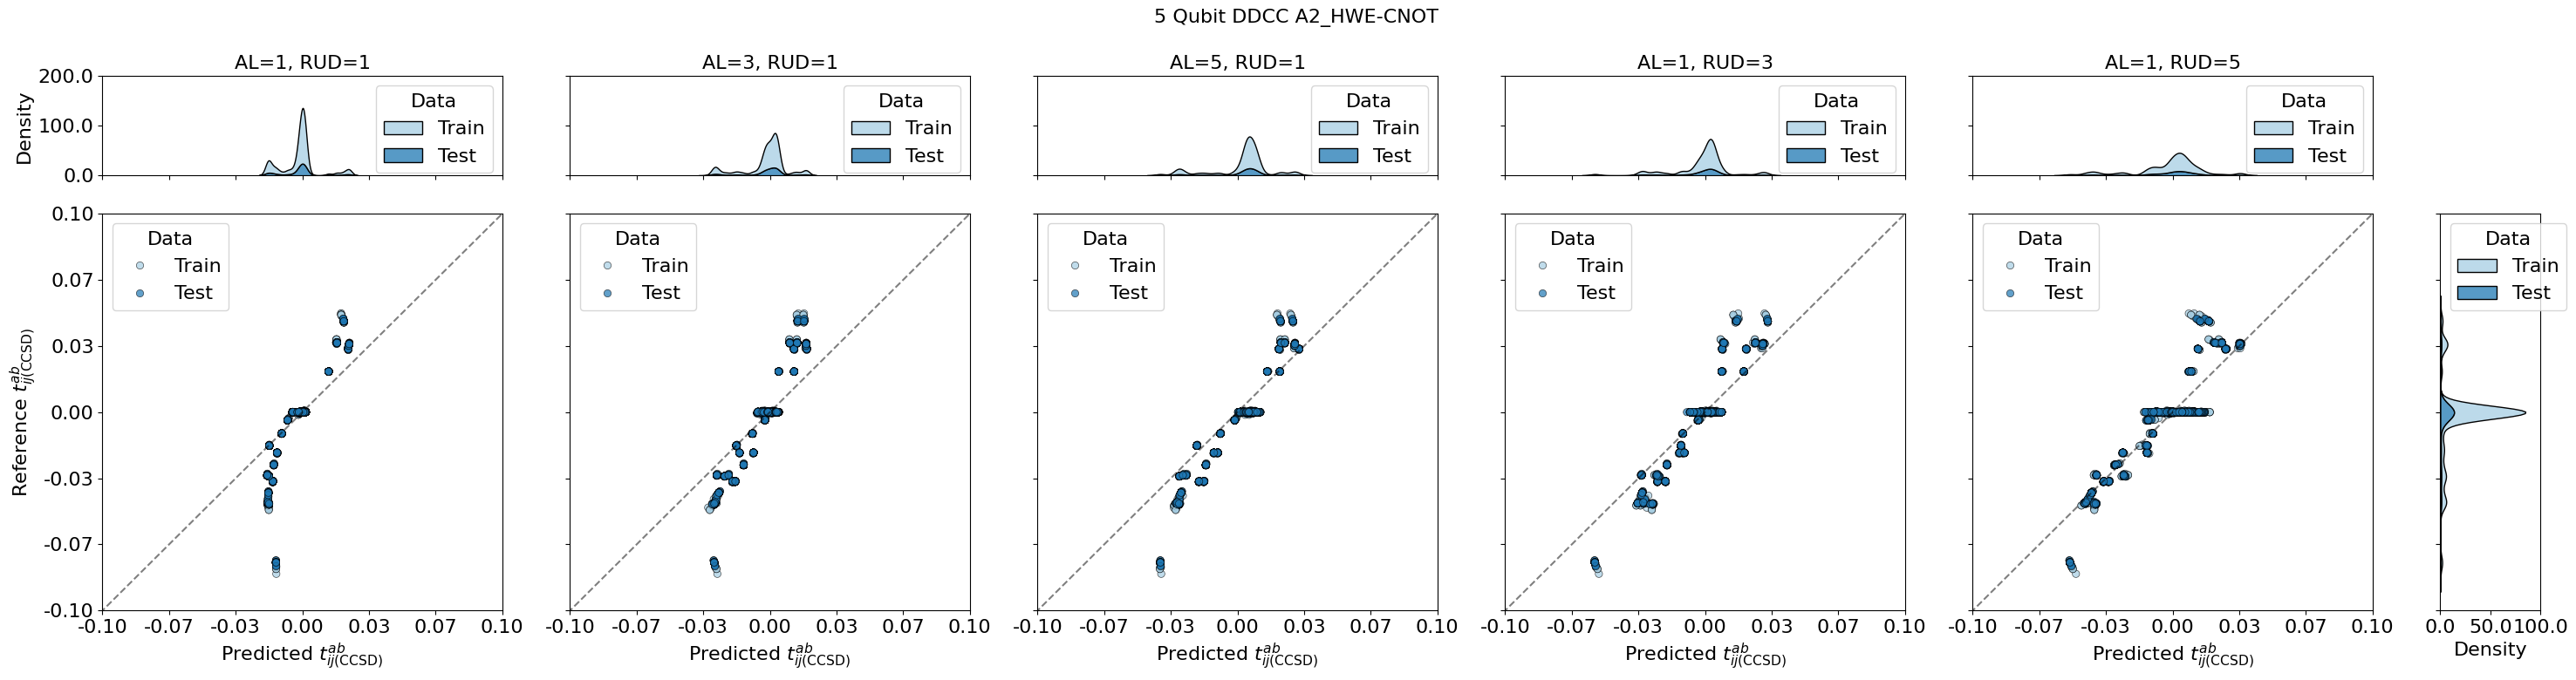

In [3]:



best_ddcc = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/5/A2_HWE-CNOT/A2_HWE-CNOT_predicted_values.csv'))
best_ddcc['Predicted'] = [float(i.strip('[]')) for i in best_ddcc['Predicted']]
best_ddcc['Reference']= [float(i.strip('[]')) for i in best_ddcc['Reference']]
best_ddcc_train, best_ddcc_test = best_ddcc[best_ddcc['Data']=='Train'], best_ddcc[best_ddcc['Data']=='Test']

AL3_ddcc = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/RUD_AL/3AL/A2_HWE-CNOT/A2_HWE-CNOT_predicted_values.csv'))
AL3_ddcc['Predicted'] = [float(i.strip('[]')) for i in AL3_ddcc['Predicted']]
AL3_ddcc['Reference']= [float(i.strip('[]')) for i in AL3_ddcc['Reference']]
AL3_ddcc_train, AL3_ddcc_test = AL3_ddcc[AL3_ddcc['Data']=='Train'], AL3_ddcc[AL3_ddcc['Data']=='Test']

AL5_ddcc = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/RUD_AL/5AL/A2_HWE-CNOT/A2_HWE-CNOT_predicted_values.csv'))
AL5_ddcc['Predicted'] = [float(i.strip('[]')) for i in AL5_ddcc['Predicted']]
AL5_ddcc['Reference']= [float(i.strip('[]')) for i in AL5_ddcc['Reference']]
AL5_ddcc_train, AL5_ddcc_test = AL5_ddcc[AL5_ddcc['Data']=='Train'], AL5_ddcc[AL5_ddcc['Data']=='Test']

RUD3_ddcc = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/RUD_AL/3RUD/A2_HWE-CNOT/A2_HWE-CNOT_predicted_values.csv'))
RUD3_ddcc['Predicted'] = [float(i.strip('[]')) for i in RUD3_ddcc['Predicted']]
RUD3_ddcc['Reference']= [float(i.strip('[]')) for i in RUD3_ddcc['Reference']]
RUD3_ddcc_train, RUD3_ddcc_test = RUD3_ddcc[RUD3_ddcc['Data']=='Train'], RUD3_ddcc[RUD3_ddcc['Data']=='Test']

RUD5_ddcc = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/RUD_AL/5RUD/A2_HWE-CNOT/A2_HWE-CNOT_predicted_values.csv'))
RUD5_ddcc['Predicted'] = [float(i.strip('[]')) for i in RUD5_ddcc['Predicted']]
RUD5_ddcc['Reference']= [float(i.strip('[]')) for i in RUD5_ddcc['Reference']]
RUD5_ddcc_train, RUD5_ddcc_test = RUD5_ddcc[RUD5_ddcc['Data']=='Train'], RUD5_ddcc[RUD5_ddcc['Data']=='Test']

# Define the datasets
datasets = {
    "AL=1, RUD=1": best_ddcc,
    "AL=3, RUD=1": AL3_ddcc,
    "AL=5, RUD=1": AL5_ddcc,
    "AL=1, RUD=3": RUD3_ddcc,
    "AL=1, RUD=5": RUD5_ddcc
}

SIZE = 16

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title
# Create the figure with a 2D grid (scatter + KDE for Predicted + KDE for Reference)
fig, axes = plt.subplots(
    2, 6, figsize=(30, 8), 
    gridspec_kw={'width_ratios': [4, 4, 4, 4, 4, 1], 'height_ratios': [1, 4]}, 
    sharey='row',  # Keep y-axis sharing, but remove sharex to control ticks manually,
    sharex='col'
)

# Iterate through datasets and create scatter + KDE plots
for i, (title, data) in enumerate(datasets.items()):
    # KDE plot of "Predicted" (top row)
    sns.kdeplot(data=data, x="Predicted", hue='Data', ax=axes[0, i], fill=True, palette=cmap,multiple='stack')
    axes[0, i].set_xticklabels([])  # Hide labels but keep ticks
    axes[0, i].set_xlabel("")  # Remove x-labels
    axes[0, i].set_title(title)
    axes[0, i].set_yticks(axes[0, i].get_yticks())  # Hide x-tick labels
    axes[0, i].set_yticklabels(axes[0, i].get_yticks())  # Hide x-tick labels    
    
    # Scatter plot in the middle row
    sns.scatterplot(data=data, x="Predicted", y="Reference", hue="Data", ax=axes[1, i], alpha=0.7, edgecolor='k', palette=cmap)
    axes[1, i].plot(range(-1,2),range(-1,2),'k--',alpha=0.5)
    axes[1, i].set_ylabel(r'Reference $t_{ij (\text{CCSD})}^{ab}$' if i == 0 else "")  # Show y-label only for first column
    axes[1, i].tick_params(axis='x')  # Ensure x-tick labels are visible
    axes[1, i].set_xlabel(r'Predicted $t_{ij (\text{CCSD})}^{ab}$')
    axes[1, i].set_ylim(-0.1,0.1)
    axes[1, i].set_xlim(-0.1,0.1)
    axes[1, i].set_xticks(np.linspace(-0.1,.1,7))  # Hide x-tick labels
    axes[1, i].set_xticklabels([f'{i:.2f}' for i in np.linspace(-0.1,.1,7)])  # Hide x-tick labels    
    axes[1, i].set_yticks(np.linspace(-0.1,.1,7))  # Hide x-tick labels
    axes[1, i].set_yticklabels([f'{i:.2f}' for i in np.linspace(-0.1,.1,7)])  # Hide x-tick labels    
    
    
# KDE plot of "Reference" on the far-right column (across all datasets)
sns.kdeplot(data=best_ddcc, y="Reference", hue='Data', ax=axes[1, 5], fill=True, palette=cmap,multiple='stack')
# axes[1, 5].set_xlabel("")  # Remove x-label
axes[1, 5].set_xticks(axes[1, 5].get_xticks())  # Hide x-tick labels
axes[1, 5].set_xticklabels(axes[1, 5].get_xticks())  # Hide x-tick labels

# Remove empty top-right subplot
axes[0, 5].axis("off")
plt.suptitle('5 Qubit DDCC A2_HWE-CNOT')
# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(os.path.expanduser('~'),'qregress/images/DDCC/distribution_parity.png'),dpi=300,bbox_inches='tight')
plt.show()

NameError: name 'best_bse5' is not defined

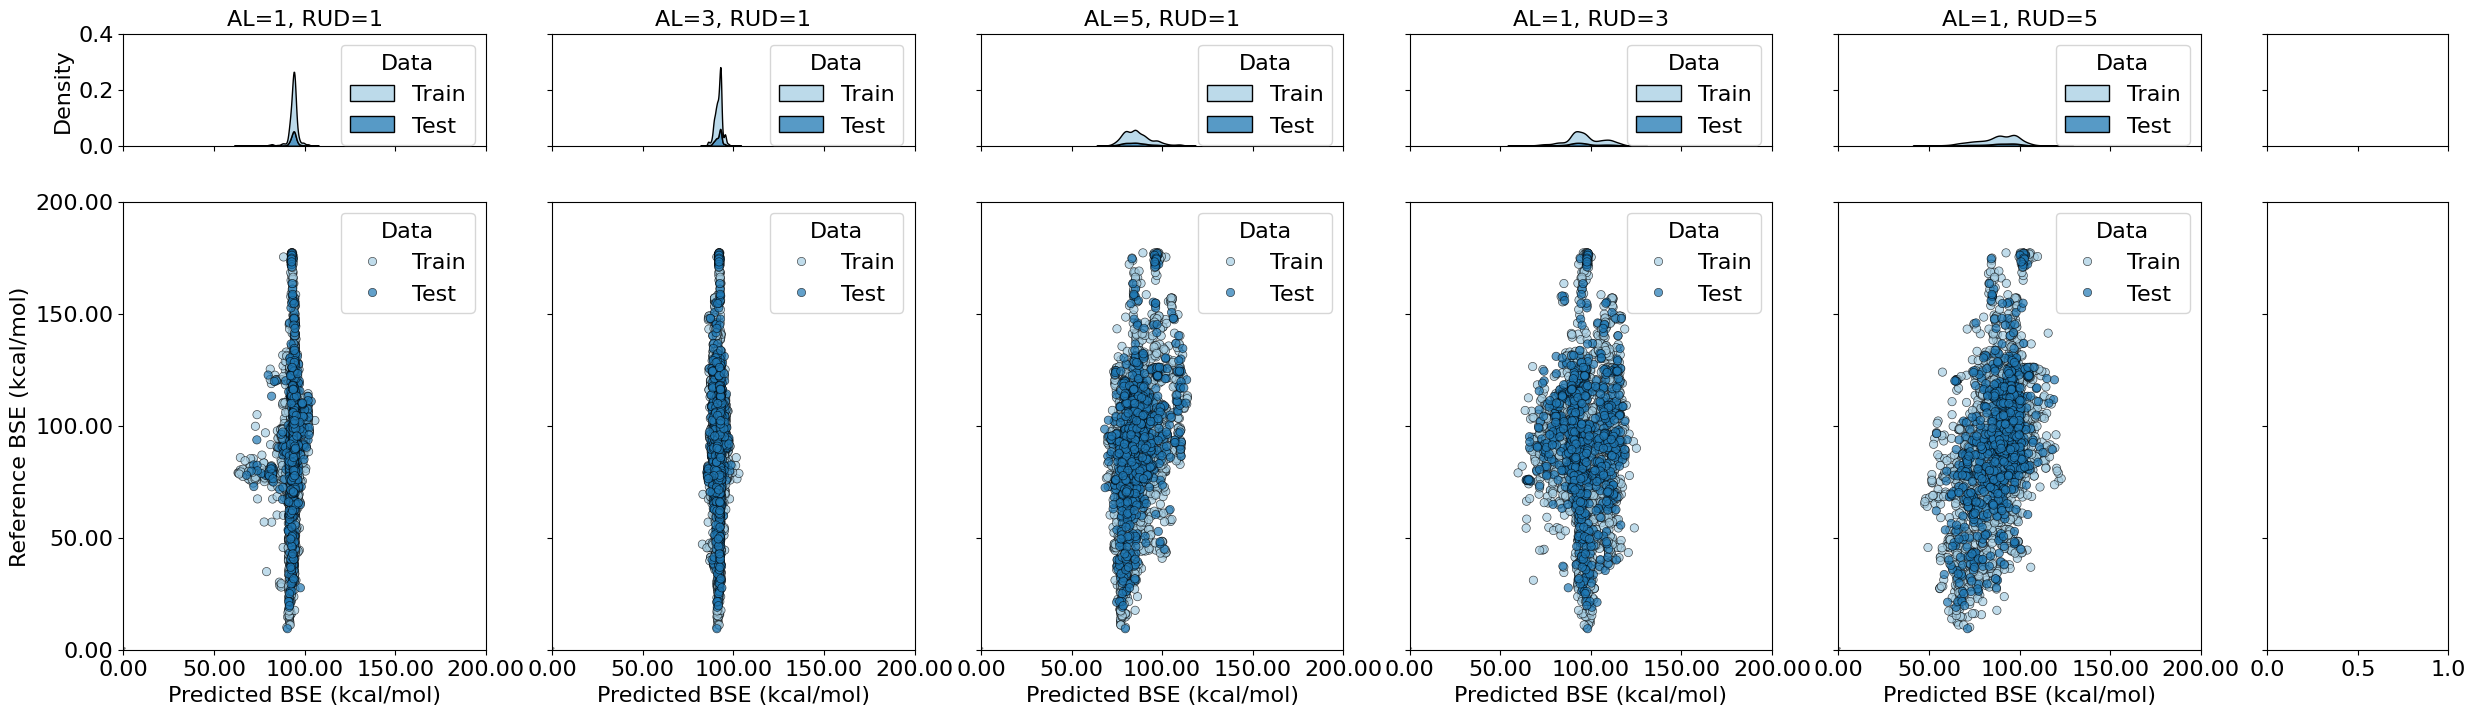

In [4]:


best_bse16 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE-calc-test/16qubit/A2_Hadamard/A2_Hadamard_predicted_values.csv'))
best_bse16['Predicted'] = [float(i.strip('[]')) for i in best_bse16['Predicted']]
best_bse16['Reference']= [float(i.strip('[]')) for i in best_bse16['Reference']]
best_bse16_train, best_bse16_test = best_bse16[best_bse16['Data']=='Train'], best_bse16[best_bse16['Data']=='Test']

AL3_bse16 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/16qubit/3AL/A2_Hadamard/A2_Hadamard_predicted_values.csv'))
AL3_bse16['Predicted'] = [float(i.strip('[]')) for i in AL3_bse16['Predicted']]
AL3_bse16['Reference']= [float(i.strip('[]')) for i in AL3_bse16['Reference']]
AL3_bse16_train, AL3_bse16_test = AL3_bse16[AL3_bse16['Data']=='Train'], AL3_bse16[AL3_bse16['Data']=='Test']

AL5_bse16 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/16qubit/5AL/A2_Hadamard/A2_Hadamard_predicted_values.csv'))
AL5_bse16['Predicted'] = [float(i.strip('[]')) for i in AL5_bse16['Predicted']]
AL5_bse16['Reference']= [float(i.strip('[]')) for i in AL5_bse16['Reference']]
AL5_bse16_train, AL5_bse16_test = AL5_bse16[AL5_bse16['Data']=='Train'], AL5_bse16[AL5_bse16['Data']=='Test']

RUD3_bse16 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/16qubit/3RUD/A2_Hadamard/A2_Hadamard_predicted_values.csv'))
RUD3_bse16['Predicted'] = [float(i.strip('[]')) for i in RUD3_bse16['Predicted']]
RUD3_bse16['Reference']= [float(i.strip('[]')) for i in RUD3_bse16['Reference']]
RUD3_bse16_train, RUD3_bse16_test = RUD3_bse16[RUD3_bse16['Data']=='Train'], RUD3_bse16[RUD3_bse16['Data']=='Test']

RUD5_bse16 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/16qubit/5RUD/A2_Hadamard/A2_Hadamard_predicted_values.csv'))
RUD5_bse16['Predicted'] = [float(i.strip('[]')) for i in RUD5_bse16['Predicted']]
RUD5_bse16['Reference']= [float(i.strip('[]')) for i in RUD5_bse16['Reference']]
RUD5_bse16_train, RUD5_bse16_test = RUD5_bse16[RUD5_bse16['Data']=='Train'], RUD5_bse16[RUD5_bse16['Data']=='Test']

# Define the datasets
datasets = {
    "AL=1, RUD=1": best_bse16,
    "AL=3, RUD=1": AL3_bse16,
    "AL=5, RUD=1": AL5_bse16,
    "AL=1, RUD=3": RUD3_bse16,
    "AL=1, RUD=5": RUD5_bse16
}

SIZE = 16

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title
# Create the figure with a 2D grid (scatter + KDE for Predicted + KDE for Reference)
fig, axes = plt.subplots(
    2, 6, figsize=(30, 8), 
    gridspec_kw={'width_ratios': [4, 4, 4, 4, 4, 2], 'height_ratios': [1, 4]}, 
    sharey='row',  # Keep y-axis sharing, but remove sharex to control ticks manually,
    sharex='col'
)

# Iterate through datasets and create scatter + KDE plots
for i, (title, data) in enumerate(datasets.items()):
    # KDE plot of "Predicted" (top row)
    sns.kdeplot(data=data, x="Predicted", hue='Data', ax=axes[0, i], fill=True, palette=cmap,multiple='stack')
    axes[0, i].set_xticklabels([])  # Hide labels but keep ticks
    axes[0, i].set_xlabel("")  # Remove x-labels
    axes[0, i].set_title(title)
    axes[0, i].set_yticks(axes[0, i].get_yticks())  # Hide x-tick labels
    axes[0, i].set_yticklabels(axes[0, i].get_yticks())  # Hide x-tick labels    
    
    # Scatter plot in the middle row
    sns.scatterplot(data=data, x="Predicted", y="Reference", hue="Data", ax=axes[1, i], alpha=0.7, edgecolor='k', palette=cmap)
    axes[1, i].plot(range(-1,2),range(-1,2),'k--',alpha=0.5)
    axes[1, i].set_ylabel(r'Reference BSE (kcal/mol)' if i == 0 else "")  # Show y-label only for first column
    axes[1, i].tick_params(axis='x')  # Ensure x-tick labels are visible
    axes[1, i].set_xlabel(r'Predicted BSE (kcal/mol)')
    axes[1,i].set_ylim(0,200)
    axes[1,i].set_xlim(0,200)
    axes[1, i].set_xticks(np.linspace(0,200,5))  # Hide x-tick labels
    axes[1, i].set_xticklabels([f'{i:.2f}' for i in np.linspace(0,200,5)])  # Hide x-tick labels    
    axes[1, i].set_yticks(np.linspace(0,200,5))  # Hide x-tick labels
    axes[1, i].set_yticklabels([f'{i:.2f}' for i in np.linspace(0,200,5)])  # Hide x-tick labels      
    # axes[1, i].vlines(best_bse5['Reference'].mean(),-10,210,color='r',label=f"{best_bse16['Reference'].mean():.2f}")
# KDE plot of "Reference" on the far-right column (across all datasets)
sns.kdeplot(data=best_bse5, y="Reference", hue='Data', ax=axes[1, 5], fill=True, palette=cmap,multiple='stack')
# axes[1, 5].set_xlabel("")  # Remove x-label
axes[1, 5].set_xticks(axes[1, 5].get_xticks())  # Hide x-tick labels
axes[1, 5].set_xticklabels(axes[1, 5].get_xticks())  # Hide x-tick labels

# Remove empty top-right subplot
axes[0, 5].axis("off")
plt.suptitle('16 Qubit BSE49 A2_Hadamard')
# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(os.path.expanduser('~'),'qregress/images/BSE/sixteenqubit/distribution_parity.png'),dpi=300,bbox_inches='tight')
plt.show()

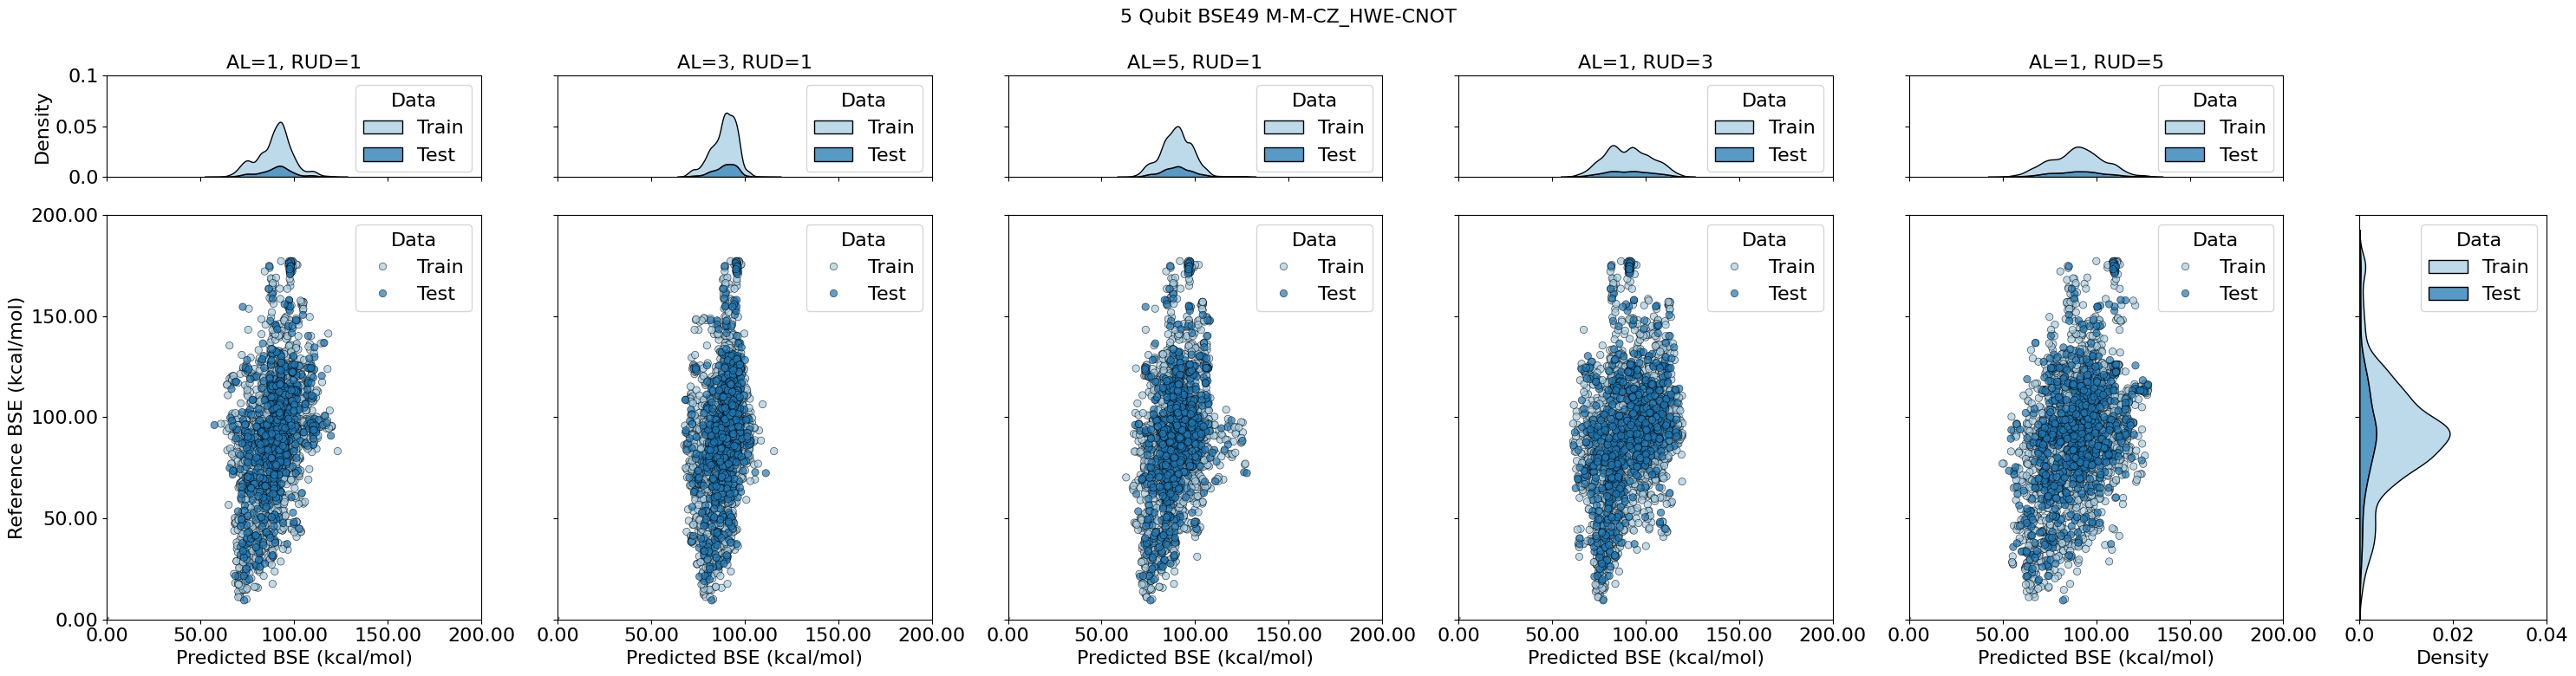

In [5]:


best_bse5 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE-calc-test/5qubit/M-M-CZ_HWE-CNOT/M-M-CZ_HWE-CNOT_predicted_values.csv'))
best_bse5['Predicted'] = [float(i.strip('[]')) for i in best_bse5['Predicted']]
best_bse5['Reference']= [float(i.strip('[]')) for i in best_bse5['Reference']]
best_bse5_train, best_bse5_test = best_bse5[best_bse5['Data']=='Train'], best_bse5[best_bse5['Data']=='Test']

AL3_bse5 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/5qubit/3AL/M-M-CZ_HWE-CNOT/M-M-CZ_HWE-CNOT_predicted_values.csv'))
AL3_bse5['Predicted'] = [float(i.strip('[]')) for i in AL3_bse5['Predicted']]
AL3_bse5['Reference']= [float(i.strip('[]')) for i in AL3_bse5['Reference']]
AL3_bse5_train, AL3_bse5_test = AL3_bse5[AL3_bse5['Data']=='Train'], AL3_bse5[AL3_bse5['Data']=='Test']

AL5_bse5 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/5qubit/5AL/M-M-CZ_HWE-CNOT/M-M-CZ_HWE-CNOT_predicted_values.csv'))
AL5_bse5['Predicted'] = [float(i.strip('[]')) for i in AL5_bse5['Predicted']]
AL5_bse5['Reference']= [float(i.strip('[]')) for i in AL5_bse5['Reference']]
AL5_bse5_train, AL5_bse5_test = AL5_bse5[AL5_bse5['Data']=='Train'], AL5_bse5[AL5_bse5['Data']=='Test']

RUD3_bse5 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/5qubit/3RUD/M-M-CZ_HWE-CNOT/M-M-CZ_HWE-CNOT_predicted_values.csv'))
RUD3_bse5['Predicted'] = [float(i.strip('[]')) for i in RUD3_bse5['Predicted']]
RUD3_bse5['Reference']= [float(i.strip('[]')) for i in RUD3_bse5['Reference']]
RUD3_bse5_train, RUD3_bse5_test = RUD3_bse5[RUD3_bse5['Data']=='Train'], RUD3_bse5[RUD3_bse5['Data']=='Test']

RUD5_bse5 = pd.read_csv(os.path.join(os.path.expanduser('~'),'qregress/BSE_RUD_AL_test/5qubit/5RUD/M-M-CZ_HWE-CNOT/M-M-CZ_HWE-CNOT_predicted_values.csv'))
RUD5_bse5['Predicted'] = [float(i.strip('[]')) for i in RUD5_bse5['Predicted']]
RUD5_bse5['Reference']= [float(i.strip('[]')) for i in RUD5_bse5['Reference']]
RUD5_bse5_train, RUD5_bse5_test = RUD5_bse5[RUD5_bse5['Data']=='Train'], RUD5_bse5[RUD5_bse5['Data']=='Test']

# Define the datasets
datasets = {
    "AL=1, RUD=1": best_bse5,
    "AL=3, RUD=1": AL3_bse5,
    "AL=5, RUD=1": AL5_bse5,
    "AL=1, RUD=3": RUD3_bse5,
    "AL=1, RUD=5": RUD5_bse5
}

SIZE = 16

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title
# Create the figure with a 2D grid (scatter + KDE for Predicted + KDE for Reference)
fig, axes = plt.subplots(
    2, 6, figsize=(30, 8), 
    gridspec_kw={'width_ratios': [4, 4, 4, 4, 4, 2], 'height_ratios': [1, 4]}, 
    sharey='row',  # Keep y-axis sharing, but remove sharex to control ticks manually,
    sharex='col'
)

# Iterate through datasets and create scatter + KDE plots
for i, (title, data) in enumerate(datasets.items()):
    # KDE plot of "Predicted" (top row)
    sns.kdeplot(data=data, x="Predicted", hue='Data', ax=axes[0, i], fill=True, palette=cmap,multiple='stack')
    axes[0, i].set_xticklabels([])  # Hide labels but keep ticks
    axes[0, i].set_xlabel("")  # Remove x-labels
    axes[0, i].set_title(title)
    axes[0, i].set_yticks(axes[0, i].get_yticks())  # Hide x-tick labels
    axes[0, i].set_yticklabels(axes[0, i].get_yticks())  # Hide x-tick labels    
    
    # Scatter plot in the middle row
    sns.scatterplot(data=data, x="Predicted", y="Reference", hue="Data", ax=axes[1, i], alpha=0.7, edgecolor='k', palette=cmap)
    axes[1, i].plot(range(-1,2),range(-1,2),'k--',alpha=0.5)
    axes[1, i].set_ylabel(r'Reference BSE (kcal/mol)' if i == 0 else "")  # Show y-label only for first column
    axes[1, i].tick_params(axis='x')  # Ensure x-tick labels are visible
    axes[1, i].set_xlabel(r'Predicted BSE (kcal/mol)')
    axes[1,i].set_ylim(0,200)
    axes[1,i].set_xlim(0,200)
    axes[1, i].set_xticks(np.linspace(0,200,5))  # Hide x-tick labels
    axes[1, i].set_xticklabels([f'{i:.2f}' for i in np.linspace(0,200,5)])  # Hide x-tick labels    
    axes[1, i].set_yticks(np.linspace(0,200,5))  # Hide x-tick labels
    axes[1, i].set_yticklabels([f'{i:.2f}' for i in np.linspace(0,200,5)])  # Hide x-tick labels         
    # axes[1, i].vlines(best_bse5['Reference'].mean(),-10,210,color='r',label=f"{best_bse16['Reference'].mean():.2f}")
# KDE plot of "Reference" on the far-right column (across all datasets)
sns.kdeplot(data=best_bse5, y="Reference", hue='Data', ax=axes[1, 5], fill=True, palette=cmap,multiple='stack')
# axes[1, 5].set_xlabel("")  # Remove x-label
axes[1, 5].set_xticks(axes[1, 5].get_xticks())  # Hide x-tick labels
axes[1, 5].set_xticklabels(axes[1, 5].get_xticks())  # Hide x-tick labels

# Remove empty top-right subplot
axes[0, 5].axis("off")
plt.suptitle('5 Qubit BSE49 M-M-CZ_HWE-CNOT')
# Adjust layout
plt.tight_layout()

plt.savefig(os.path.join(os.path.expanduser('~'),'qregress/images/BSE/fivequbit/distribution_parity.png'),dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
def results_df(path):
    '''
    Take the top directory where the results are and return a nice Pandas dataframe

    parameters
    ----------
    path: str
        Path to the top directory `path/*/*results.json`

    returns
    -------
    df: pd.DataFrame
        Dataframe containing results
    '''
    results_dict = {}
    for i in glob(os.path.join(path,'*/*results.json')):
        with open(i,'r') as f:
            results = json.load(f)
        name = os.path.basename(i).replace('_results.json','')
        results['encoder']=name.split('_')[0]
        results['ansatz']=name.split('_')[1]
        results_dict[name]=results

    df = pd.DataFrame(results_dict).T
    
    return df



In [ ]:
def plot_all(df,name,save_dir):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6), gridspec_kw={'width_ratios': [1, 1]})
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12
    figsize = fig.get_size_inches()
    fig.set_size_inches(figsize * 1.2)
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    
    
    sns.boxplot(data=df,x='encoder',y='value',hue='variable',ax=ax1,palette=sns.color_palette('Paired',2))
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90) 
    ax1.set_ylim(np.floor(df['value'].min()),np.ceil(df['value'].max()))
    ax1.set_ylabel('R$^{2}$')
    ax1.set_xlabel('Encoder')
    ax1.legend(title='')
    
    sns.boxplot(data=df,x='ansatz',y='value',hue='variable',ax=ax2,palette=sns.color_palette('Paired',2))
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90) 
    ax2.set_ylim(np.floor(df['value'].min()),np.ceil(df['value'].max()))
    ax2.set_ylabel('R$^{2}$')
    ax2.set_xlabel('Ansatz')
    ax2.legend(title='')
    plt.tight_layout()
    plt.savefig(os.path.join(os.path.expanduser('~'),save_dir,f'{name}_boxplots.png'),dpi=300,bbox_inches='tight')
    plt.show()
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,6),sharey=False)
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12
    
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    figsize = fig.get_size_inches()
    fig.set_size_inches(figsize * 1.5)
    ax1=sns.heatmap(df[df['variable']=='Train'][["encoder", "ansatz", "value"]].pivot(index='encoder', columns='ansatz', values='value').astype(float),annot_kws={"size": 12}, square=True, annot=True, linewidth=.5,fmt='.2f',ax=ax1,vmax=1,vmin=-1,cbar=True,center=0,cmap='rocket')
    ax1.set_title("Train")
    ax1.set_ylabel('Encoder')
    ax1.set_xlabel('Ansatz')
    ax1.set_aspect("equal")
    
    ax2=sns.heatmap(df[df['variable']=='Test'][["encoder", "ansatz", "value"]].pivot(index='encoder', columns='ansatz', values='value').astype(float), annot_kws={"size": 12}, square=True, annot=True, linewidth=.5,fmt='.2f',ax=ax2,vmax=1,vmin=-1,center=0,cmap='rocket')
    ax2.set_title("Test")
    ax2.set_ylabel('Encoder')
    ax2.set_xlabel('Ansatz')
    ax2.set_aspect("equal")
    
    ax1.collections[0].colorbar.set_label('R$^{2}$')
    ax2.collections[0].colorbar.set_label('R$^{2}$')

    plt.subplots_adjust(wspace=0.1,hspace=0)
    plt.tight_layout()  # Leave space for color bar
    plt.savefig(os.path.join(os.path.expanduser('~'),save_dir,f'{name}_heatplots.png'),dpi=300,bbox_inches='tight')
    plt.show()

In [ ]:
def plot(data_dir,name,save_dir):
    df = results_df(data_dir).rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])
    plot_all(df,name,save_dir)    

In [ ]:
plot("function-calc-test/fivequbit_tests/lin5qubit/",'linear','qregress/images/Function_Fitting/fivequbit/')
plot("function-calc-test/fivequbit_tests/quad5qubit/",'quadratic','qregress/images/Function_Fitting/fivequbit/')
plot("function-calc-test/fivequbit_tests/sin5qubit/",'sine','qregress/images/Function_Fitting/fivequbit/')

In [ ]:
plot("function-calc-test/sixteenqubit_test/lin16qubit/",'linear','qregress/images/Function_Fitting/sixteenqubit/')
plot("function-calc-test/sixteenqubit_test/quad16qubit/",'quadratic','qregress/images/Function_Fitting/sixteenqubit/')
plot("function-calc-test/sixteenqubit_test/sin16qubit/",'sine','qregress/images/Function_Fitting/sixteenqubit/')

In [ ]:
plot("BSE-calc-test/5qubit/",'BSE','qregress/images/BSE/fivequbit/')
plot("BSE-calc-test/16qubit/",'BSE','qregress/images/BSE/sixteenqubit/')
plot("qml_DDCC/5/",'DDCC','qregress/images/DDCC/')

In [ ]:

checkbse5 = results_df("BSE-calc-test/5qubit/").rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])

In [ ]:
results_df("BSE-calc-test/5qubit/").sort_values(by=['R2_train','R2_test'])

In [ ]:
M-M-CZ_HWE-CNOT

In [ ]:
checkbse5[checkbse5['encoder']=='A1-A1-CZ']['value'].astype(float).describe()

In [ ]:
# [(i,checkbse5[checkbse5['encoder']==i]['value'].astype(float)) for i in set(checkbse5['encoder'])]
pd.concat([checkbse5[checkbse5['encoder']==i]['value'].astype(float).to_frame().describe().rename(columns={'value':i}) for i in set(checkbse5['encoder'])],axis=1).T.sort_values(by=['mean'])

In [ ]:
pd.concat([checkbse5[checkbse5['ansatz']==i]['value'].astype(float).to_frame().describe().rename(columns={'value':i}) for i in set(checkbse5['ansatz'])],axis=1).T.sort_values(by=['mean'])

In [ ]:
sorted([(i,f"{checkbse5[checkbse5['encoder']==i]['value'].astype(float).mean():.4f}") for i in set(checkbse5['encoder'])],key=lambda x: x[1])

In [ ]:
sorted([(i,f"{checkbse5[checkbse5['ansatz']==i]['value'].astype(float).mean():.4f}") for i in set(checkbse5['ansatz'])],key=lambda x: x[1])

In [ ]:
def plot_combined(df,name,save_dir):


    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6), gridspec_kw={'width_ratios': [1, 1]})
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12
    figsize = fig.get_size_inches()
    fig.set_size_inches(figsize * 1.2)
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    
    
    sns.boxplot(data=df,x='encoder',y='value',hue='variable',ax=ax1,palette=sns.color_palette('Paired',2))
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90) 
    ax1.set_ylim(np.floor(df['value'].min()),np.ceil(df['value'].max()))
    ax1.set_ylabel('R$^{2}$')
    ax1.set_xlabel('Encoder')
    ax1.legend(title='')
    
    sns.boxplot(data=df,x='ansatz',y='value',hue='variable',ax=ax2,palette=sns.color_palette('Paired',2))
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90) 
    ax2.set_ylim(np.floor(df['value'].min()),np.ceil(df['value'].max()))
    ax2.set_ylabel('R$^{2}$')
    ax2.set_xlabel('Ansatz')
    ax2.legend(title='')
    plt.tight_layout()
    plt.savefig(os.path.join(os.path.expanduser('~'),save_dir,f'{name}_boxplots.png'),dpi=300,bbox_inches='tight')
    plt.show()    

In [ ]:
concatfive = pd.concat([results_df("function-calc-test/fivequbit_tests/lin5qubit/"),results_df("function-calc-test/fivequbit_tests/quad5qubit/"),results_df("function-calc-test/fivequbit_tests/sin5qubit/")]).rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])

In [ ]:
lin5 = results_df("function-calc-test/fivequbit_tests/lin5qubit/").rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])
quad5 = results_df("function-calc-test/fivequbit_tests/quad5qubit/").rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])
sin5 = results_df("function-calc-test/fivequbit_tests/sin5qubit/").rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])

In [ ]:
check5 = results_df("function-calc-test/fivequbit_tests/lin5qubit//")
check5[(check5['R2_train']>=0.988)&(check5['R2_test']>=0.988)].sort_values(by=['R2_test','R2_train'])

In [ ]:
sorted([(i,f"{concatfive[concatfive['encoder']==i]['value'].astype(float).mean():.4f}") for i in set(concatfive['encoder'])],key=lambda x: x[1])

In [ ]:
sorted([(i,f"{concatfive[concatfive['ansatz']==i]['value'].astype(float).mean():.4f}") for i in set(concatfive['ansatz'])],key=lambda x: x[1])

In [ ]:
plot_combined(concatfive,'five_feature_function_fitting','qregress/images/Function_Fitting/fivequbit/')

In [ ]:
concatsixteen = pd.concat([results_df("function-calc-test/sixteenqubit_test/lin16qubit/"),results_df("function-calc-test/sixteenqubit_test/quad16qubit//"),results_df("function-calc-test/sixteenqubit_test/sin16qubit/")]).rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])

In [ ]:
lin16 = results_df("function-calc-test/sixteenqubit_test/lin16qubit/").rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])
quad16 = results_df("function-calc-test/sixteenqubit_test/quad16qubit//").rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])
sin16 = results_df("function-calc-test/sixteenqubit_test/sin16qubit/").rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['encoder','ansatz'], value_vars=['Train','Test']).sort_values(by=['encoder','ansatz'])

In [ ]:
check = results_df("function-calc-test/sixteenqubit_test/lin16qubit//")
check[(check['R2_train']>=0.988)&(check['R2_test']>=0.988)].sort_values(by=['R2_test','R2_train'])

In [ ]:
sorted([(i,f"{sin16[sin16['encoder']==i]['value'].astype(float).mean():.4f}") for i in set(sin16['encoder'])],key=lambda x: x[1])

In [ ]:
sorted([(i,f"{sin16[sin16['ansatz']==i]['value'].astype(float).mean():.4f}") for i in set(sin16['ansatz'])],key=lambda x: x[1])

In [ ]:
plot_combined(concatsixteen,'sixteen_feature_function_fitting','qregress/images/Function_Fitting/sixteenqubit/')

In [ ]:
'images/Function_Fitting/sixteenqubit/sixteen_feature_function_fitting_boxplots.png'